        Aerosol- und Nanotechnologie II | Friederike Baumgart | Matr.-Nr. 4343944 | Abgabe: 01.05.22

# Aufgabe 1

In einen kontinuierlichen Rührkesselreaktor werden Partikel einer vorgegebenen Größe geleitet. Diese koagulieren monodispers, sodass eine Verteilung der Partikelanzahl $n(v)$ jeder Partikelgröße mit dem Volumen $v$ entsteht. Diese Partikelverteilung soll in dieser Aufgabe sowohl analytisch als auch numerisch bestimmt werden. Beide Ergebnisse werden abschließend miteinander vergliechen.

Aus der Massenbilanz für den stationären Betrieb

$$
Q n(v)=Q n_{0}(v)+B\left(\begin{array}{c}
\text { net rate of formation } \\
\text { per unit volume }
\end{array}\right)-B\left(\begin{array}{c}
\text { rate of deposition } \\
\text { per unit volume }
\end{array}\right)
\label{eq:Massenbilanz}\tag{1}
$$

mit dem Massenstrom $Q$ und dem Reaktorvolumen $B$ ergibt sich die Differentialgleichung (DGL)

$$
\frac{n_{0}}{\tau}=\frac{n}{\tau}+\frac{d(n q)}{d v}
\label{eq:DGL}\tag{2}
$$

mit der Verweilzeit $\tau = Q/B$, der Partikelkonzentration im Zulauf $N_0$ und der Variable $q=A v^{1 / 3}$ mit $A = 0.1~\mathrm{m}^{2/3}$.

Eine analytische Lösung der DGL lautet

$$
n(v)=\frac{1}{A v^{1 / 3}}\left\{\exp \left[\frac{3}{2} \frac{\left(v_{0}^{2 / 3}-v^{2 / 3}\right)}{A \tau}\right]\right\} \frac{N_{0}}{\tau} \quad\left(v>v_{0}\right).
\label{eq:Loesung_an}\tag{3}
$$

### Parameter

Im Folgenden ist eine numerische Lösung der DGL dargestellt.
Dafür werden benötigte Datenbanken importiert und Vektoren mit den Volumina bzw. Durchmessern der Partikel erstellt.
Betrachtet werden sollen Partikel mit einem Durchmesser von $0.5 \cdot 10^{-9}$ bis $1000 \cdot 10^{-9}~\mathrm{m}$. In dieser Berechnung sollen die Partikel monodispers koagulieren. Somit werden in einen Vektor $v_\mathrm{p}$ die möglichen Partikelvolumina geschrieben, wenn sich das Volumen, beginnend mit $v_\mathrm{min}$, bei jedem Schritt verdoppelt. Die nächstkleinere ganze Zahl von
$$
v_{\mathrm{p, num}} = \frac{\log \left( \frac{v_{\mathrm{p, max}}}{v_{\mathrm{p, min}}}\right)}{\log 2}+2
\label{eq:np_num}\tag{4}
$$
wird als Schrittzahl festgelegt und für jeden Schritt das entsprechende Partikelvolumen berechnet. Aus dem Volumenvektor $v_\mathrm{p}$ wird ein zugehöriger Vektor für den Partikeldurchmesser $d_\mathrm{p}$ erstellt.

In [1]:
import numpy as np
import scipy.integrate
from matplotlib import pyplot as plt

dp_min = 0.5e-9                                          # m
dp_max = 1000e-9                                         # m
vp_min = np.pi * (dp_min)**3  /6                         # m^3
vp_max = np.pi * (dp_max)**3  /6                         # m^3
vp_num = int(np.log(vp_max / vp_min) // np.log(2) + 2)   # Schrittzahl
vp = np.zeros((vp_num))                                  # Vektor Partikelgrößen
for i in range(vp_num): 
    vp[i] = vp_min * 2**i                                # monodisperse Koagulation
dp = ( 6 * vp/ np.pi)**(1/3.0)                           # Zugehöriger Vektor für Durchmesser

Des Weiteren werden Volumenstrom und Reaktorvolumen definiert, woraus die Verweilzeit berechnet wird sowie der Anfangswert der DGL.

In [2]:
#Verweilzeit
Q = 0.5        # m^3/s      Volumenstrom
#B = 1          # m^3        Reaktorvolumen 
B =  1.6598619838075238e-10 #aus Aufgabe 3
tau = B/Q      # s          Verweilzeit

#Startwerte
N_0 = 1e17     # 1/m^3
y0 = [N_0/tau] # 1/(m^3 s)

A = 1e-1       # m^(2/3)    für Berechnung von q(v)

### Funktionen

Abhängig von entsprechenden Variablen, werden mehrere Funktionen erstellt, die bei der anschließenden Berechnung aufgerufen werden.<br>
Zunächst wird eine Funktion für die Berechnung von $q$ definiert. Anschließend werden die analytische Lösung aus Gleichung [3](#mjx-eqn-eq:Loesung_an) sowie die DGL in Gleichung [2](#mjx-eqn-eq:DGL) für die numerische Lösung in jeweils eine Funktion geschrieben.<br>
Um einen Solver für gewöhnliche DGL verwenden zu können, werden die Variablen $n$ und $q$ zunächst als eine Variable $nq$ zusammengefasst. Da Gleichung [2](#mjx-eqn-eq:DGL) ein nicht mit $q$ multipliziertes $n$ enthält, wird ein $n = nq/q$ definiert. Des Weiteren wird berücksichtigt, dass $N_0$ die Konzentration der Anfangspartikel mit der Größe $v_\mathrm{p, min}$ ist und somit für alle anderen Partikelgrößen gleich null ist.<br>
Um den mittleren Partikeldurchmesser einer Verteilung über

$$
d_{\mathrm{p, avg}} = \frac{\sum^i n_i \cdot d_{\mathrm{p, }i}}{\sum^i n_i}
\label{eq:dp_avg}\tag{5}
$$

zu bestimmen, wird ebenfalls eine Funktion erstellt.

In [3]:
def fun_q(v): 
    return A * v **(1/3)

#Analytische Lösung:
def an_n(v):
    return (1/(A * v**(1/3.0))) * np.exp(
            (3/2.0) * (vp_min**(2/3.0) - v**(2/3.0))/(A * tau)
            ) * (N_0 / tau)

#DGL für numerische Lösung:
def dnqdv(v, nq):
    q = fun_q(v)
    n = nq/q
    if v > vp_min:
        dnqdv = - n/tau
    elif v == vp_min:
        dnqdv = N_0/tau - n/tau     
    return dnqdv

#Mittlerer Partikeldurchmesser
def dp_avg(n, dp):
    return np.sum(n * dp) / np.sum(n)

## Analytische Lösung

Um die analytische Lösung zu berechnen, wird der Vektor mit den festgelegten Partikelgrößen an die Funktion mit der analytischen Lösung der DGL gegeben. Daraus wird der durchschnittliche Partikeldurchmesser berechnet und ausgegeben.

In [4]:
n_an = an_n(vp)
dp_av = dp_avg(n_an, dp)
print(f'Analytisch: dp_avg = {dp_av} at B = {B} m^3, tau = {tau} s')


Analytisch: dp_avg = 3.500000316157969e-09 at B = 1.6598619838075238e-10 m^3, tau = 3.3197239676150475e-10 s


## Numerische Lösung

Um eine stabile, numerische Lösung zu erhalten, muss die DGL für jeden Teilschritt zwischen zwei Partikelgrößen gelöst werden. $\richtig?$
Verwendet werden soll der Solver _solve_ivp_ aus der Datenbank _scipy.integrate_. Zunächst werden als Optionen die Toleranzen gespeichert. Anschließend werden zwei leere Listen erstellt, in denen die Lösung für nq bzw. die zugehörigen Partikelvolumina gespeichert werden sollen. Vom Volumenvektor wird eine Kopie erstellt, die in jedem Integrationsschritt auf zwei, als Integrationsgrenzen dienende, Werte gekürzt wird. 

In [5]:
options = {'rtol': 1e-12, #Toleranzen
           'atol': 1e-12}
res_nq_list = []          # Leere Liste für Lösung nq
res_v_list = []           # Leere Liste für zugehörige Partikelvolumina
vpn = vp.copy()           # Volumenvektor
vp_min_n = vp_min         # Laufvariable: untere Integrationsgrenze, beginnend bei vp_min
rv = 0.0                  # Laufvariable der Schleife mit Startwert 0.0

Die DGL wird in einer while-Schleife durch die Partikelvolumina gelöst. Zu Beginn wird der Integrationsbereich vom kleinsten Partikelvolumen bzw. der oberen Grenze des letzten Integrationsschrittes bis zum nächstgrößeren Partikelvolumen festgelegt.
An den Solver wird die Funktion mit der DGL, der Integrationsbereich und der Startwert übergeben. Außerdem wird die Methode LSODA gewählt und die zuvor definierten Integrationstoleranzen angegeben.

Die Lösung wird an die zuvor erstellten Listen übergeben. Für den nächsten Integrationsschritt wird das größte Partikelvolumen dieses Schrittes als nächste untere Integrationsgenze und neuer Wert der Laufvariable der Schleife gewählt. Die letzte Lösung der DGL wird der neue Anfangswert.

In [6]:
while rv < (vp_max * 0.99):
    # Festlegung Integrationsgrenzen und Lösung DGL
    vpn = [vpn[0], vpn[1]]
    res = scipy.integrate.solve_ivp(dnqdv, vpn, y0, method='LSODA', **options)

    # Ergebnis für nq und zugehöriges v in Listen 
    res_nq = res.y[0]
    res_v = res.t
    res_nq_list.extend(list(res_nq))
    res_v_list.extend(list(res_v))
    
    #Jeweils letzter Wert dieses Schrittes wird erster Wert des nächsten Schrittes
    vp_min_n = res_v[-1] 
    vpn = vp.copy()                 # Neuer Volumenvektor
    for i in range(vp_num): 
        vpn[i] = vp_min_n * 2**i 
    y0 = [res_nq[-1]]               # Neuer Startwert
    rv = res_v[-1]                  # Neuer Wert der Laufvariable für Schleife

Nach Durchlaufen der Schleife werden die finale Lösung $n = nq/q$ sowie der mittlere Durchmesser berechnet.

In [7]:
#DGL wurde für nq als eine Variable gelöst, deshalb muss Lösung noch durch q(v) geteilt werden
res_nq = np.array(res_nq_list)
res_v = np.array(res_v_list)
q_sol = A * res_v **(1/3.0)
res_n = res_nq / q_sol              # n = nq/q

#Umrechnung in dp und Berechnung Mittelwert
res_dp = ( 6 * res_v/ np.pi)**(1/3.0)
dp_av = dp_avg(res_n, res_dp)
print(f'Numerisch: dp_av = {dp_av}')

if vp_min > res_v[0]:
    print('Fehler: vp_min unterschritten!')


Numerisch: dp_av = 6.88980243264748e-09


## Ergebnisse

Abschließend werden beide Lösungen sowie der mittlere Durchmesser graphisch dargestellt.

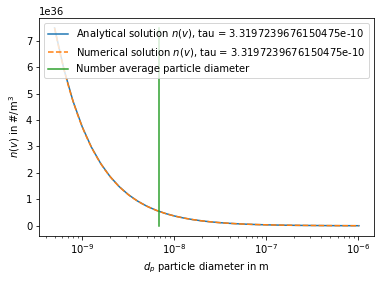

In [8]:
fig, ax = plt.subplots()
plt.semilogx(dp, an_n(vp), label=f'Analytical solution $n(v)$, tau = {tau}')
plt.semilogx(res_dp, res_n, '--', label=f'Numerical solution $n(v)$, tau = {tau}')
plt.semilogx([dp_av, dp_av], [np.min(an_n(vp)), np.max(an_n(vp))], label='Number average particle diameter')
plt.ylabel(r'$n(v)$ in #/m$^3$')
plt.xlabel(r'$d_p$ particle diameter in m')
plt.legend()
